In [2]:
import torch
import torchvision
from torchvision import transforms, datasets


C:\tools\Manim\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train = datasets.MNIST("", train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))
test =  datasets.MNIST("", train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
for data in trainset:
    print(data)
    break 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = data[0][0], data[1][3]
print(y)


tensor(1)


In [8]:
import matplotlib.pyplot as plt

In [9]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


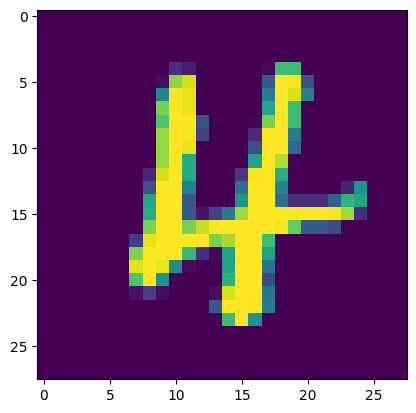

In [38]:
plt.imshow(data[0][9].view(28,28))

In [39]:
total = 0
counter_dict = {0:0, 1:0, 2:0,  3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1
        
print(counter_dict)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [40]:
import torch.nn as nn
import torch.nn.functional as F 

In [47]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
#Linear(input output) => Input is basically the number of inputs. here all images are 28*28 = 784 pixels (flattened image)
#output =>  3 layers of 64 neurons.  
#fc1(fully connected 1)     
        self.fc1 = nn.Linear(784, 64)
        #first layer takes 784 inputs and has 64 outputs
        self.fc2 = nn.Linear(64, 64)
        #second layer takes 64 inputs and has 64 outputs
        self.fc3 = nn.Linear(64, 64)
        #third layer takes 64 inputs and has 64 outputs
        self.fc4 = nn.Linear(64, 10)
        #fourth layer takes 64 inputs and has 10 classes it can classify them into: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
        
    def forward(self, x):
        #here we're defining the activation functions at each layer. we're using RELU on the first three layers
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x)) 
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
        
        
           
net = Net()
print(net)        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [50]:
X = torch.randn((28, 28))
X = X.view(-1, 28*28)


In [49]:
output = net(X)

In [51]:
output

tensor([[-2.4121, -2.3453, -2.2431, -2.3044, -2.3150, -2.1871, -2.4108, -2.2803,
         -2.1826, -2.3768]], grad_fn=<LogSoftmaxBackward0>)

In [59]:
import torch.optim as optim

#here, we set the optimizer we want to use. Optimizers are built into PyTorch and we don't have to worry about that
# here the optimizer we are using  is called Adam, and we've set the learning rate to be 0.001
optimizer = optim.Adam(net.parameters(), lr = 0.001)
#we aren't using decaying learning rates here for simplicity reasons but we wil be doing that eventually
#below, we are setting epoch, which is basically how many times we want to run through the dataset. We run through it more than once for better nn
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset: #batch of data
        X, y = data  # X is the batch of features, y is the batch of targets
        net.zero_grad() # we need to set the gradients to zero after each step
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() #again, backward() is an inbuilt function in PyTorch which applies the loss backwards for you
        optimizer.step()  #attempt to optimize weights to account for loss/gradients
        
    print(loss)
        
        

tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)


In [60]:
correct = 0
total = 0

# Let us now see how accurate our thing is
with torch.no_grad():
     for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))

        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1

print("Accuracy: ", round(correct/total, 3))               
        

Accuracy:  0.988


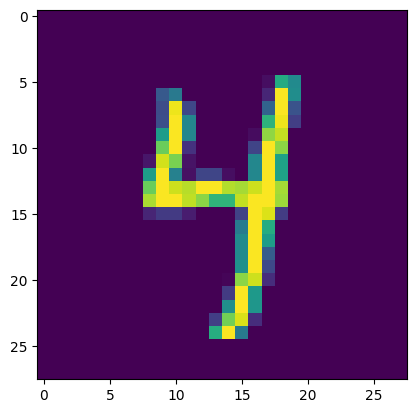

In [61]:
plt.imshow(X[0].view(28,28))
plt.show()

In [62]:
#we're reshaping the 0th element of X as a flattened 28*28 and getting the 0th element
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(4)
